# Monte Carlo Tree Search In Action

### Upper Confidence Bound for MCTS

$$
U(s, a) = Q(s, a) + c_{puct} P(s, a) \frac{\sqrt{\sum_b N(s, b)}}{1 + N(s, a)}
$$

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from alphazero.gomoku_game import GomokuGame as Game
from alphazero.mcts import MCTS

In [3]:
BOARD_SIZE=15

---
### The initial board

In [4]:
# Yixin says: This is a 100% win for white - I guess we're not quite there, yet...;-(
# stones = "C11F9E9G8F7G7G9H8"
# stones = "C11F9E9G8F7G7G9H8I8H7I6I9F6H6H9I5J4"
stones = "H8G8"

2022-08-04 15:14:16.409553: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/wgiersche/.local/share/virtualenvs/DeepGomoku-cXtJ_EtM/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


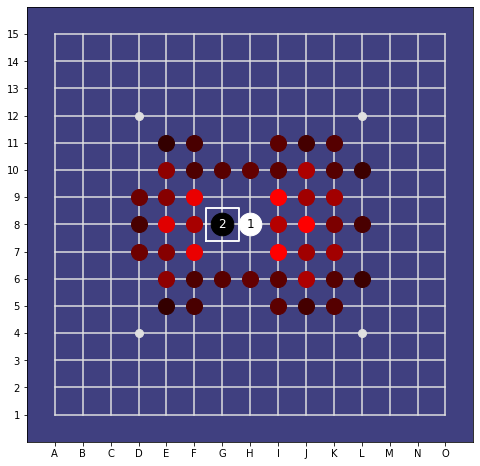

In [5]:
from domoku.policies.heuristic_policy import HeuristicPolicy
from domoku.board import GomokuBoard as LegacyBoard

policy = HeuristicPolicy(BOARD_SIZE, cut_off=.1)
board_t = LegacyBoard(n=BOARD_SIZE, disp_width=8, stones=stones.replace(" ", ""), heuristics=policy)
board_t.display()

In [9]:
from alphazero.interfaces import MctsParams
from alphazero.gomoku_game import ConstantBoardInitializer

the_game = Game(BOARD_SIZE, initializer=ConstantBoardInitializer(stones))

mcts_params = MctsParams(cpuct=1.0, num_simulations=100, model_threshold=.3)

brain_d = policy
mcts_d = MCTS(the_game, brain_d, params=mcts_params)

brain_c = policy
mcts_c = MCTS(the_game, brain_c, params=mcts_params)

board = the_game.get_initial_board()
Move=board.Stone

colors = ['Black', 'White']

In [10]:
for i in range(30):

    # weaker and loose challenger
    #
    probs = mcts_c.get_action_prob(board, temperature=1)
    # print(f"Advisable: {[Move(m) for m in brain_d.get_advisable_actions(board.math_rep)]}")
    move = Move(np.random.choice(225, p=probs))
    # print(f"{colors[board.get_current_player()]}: {move}")
    board.act(move)
    if mcts_d.game.get_game_ended(board):
        print(board.stones)
        print("Black wins")
        break

    # Stronger and tight defender
    #
    probs = mcts_d.get_action_prob(board, temperature=0)
    # print(f"Advisable: {[Move(m) for m in brain_d.get_advisable_actions(board.math_rep)]}")
    move = Move(np.random.choice(225, p=probs))
    # print(f"{colors[board.get_current_player()]}: {move}")
    board.act(move)

    print(board.stones)

    if mcts_d.game.get_game_ended(board):
        print("White wins")
        break


[H8, G8, K11, J10]
[H8, G8, K11, J10, G6, H6]
[H8, G8, K11, J10, G6, H6, G11, F11]
[H8, G8, K11, J10, G6, H6, G11, F11, I8, H7]
[H8, G8, K11, J10, G6, H6, G11, F11, I8, H7, F9, G9]
[H8, G8, K11, J10, G6, H6, G11, F11, I8, H7, F9, G9, J5, J7]
[H8, G8, K11, J10, G6, H6, G11, F11, I8, H7, F9, G9, J5, J7, K7, J8]
[H8, G8, K11, J10, G6, H6, G11, F11, I8, H7, F9, G9, J5, J7, K7, J8, J6, I7]
[H8, G8, K11, J10, G6, H6, G11, F11, I8, H7, F9, G9, J5, J7, K7, J8, J6, I7, K9, G5]
[H8, G8, K11, J10, G6, H6, G11, F11, I8, H7, F9, G9, J5, J7, K7, J8, J6, I7, K9, G5, F4, J11]
[H8, G8, K11, J10, G6, H6, G11, F11, I8, H7, F9, G9, J5, J7, K7, J8, J6, I7, K9, G5, F4, J11, J9, I10]
[H8, G8, K11, J10, G6, H6, G11, F11, I8, H7, F9, G9, J5, J7, K7, J8, J6, I7, K9, G5, F4, J11, J9, I10, F7, K10]
[H8, G8, K11, J10, G6, H6, G11, F11, I8, H7, F9, G9, J5, J7, K7, J8, J6, I7, K9, G5, F4, J11, J9, I10, F7, K10, L10, L9]
[H8, G8, K11, J10, G6, H6, G11, F11, I8, H7, F9, G9, J5, J7, K7, J8, J6, I7, K9, G5, F4, J11, J9,

In [11]:
board.plot()

                                                     
15    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
14    .  .  .  .  .  .  .  .  .  .  .  .  X  .  .    
13    .  .  .  .  .  .  .  .  .  X  .  O  .  .  .    
12    .  .  .  .  .  .  .  .  X  .  O  .  .  .  .    
11    .  .  .  .  .  O  X  .  .  O  X  O  .  X  .    
10    .  .  .  .  .  .  O  X  O  O  O  X  O  .  .    
 9    .  .  .  .  .  X  O  X  .  X  X  O  .  O  .    
 8    .  .  .  . [X] .  O  X  X  O  O  .  X  O  X    
 7    .  .  .  .  .  X  .  O  O  O  X  .  .  O  .    
 6    .  .  .  .  .  O  X  O  X  X  .  .  .  X  .    
 5    .  .  .  .  .  .  O  X  O  X  .  .  .  .  .    
 4    .  .  .  .  .  X  .  X  X  O  .  .  .  .  .    
 3    .  .  .  .  .  .  .  .  .  O  .  .  .  .  .    
 2    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
 1    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
                                                     
      A  B  C  D  E  F  G  H  I  J  K  L  M  N  O


---

## Reviewing the game on the way back

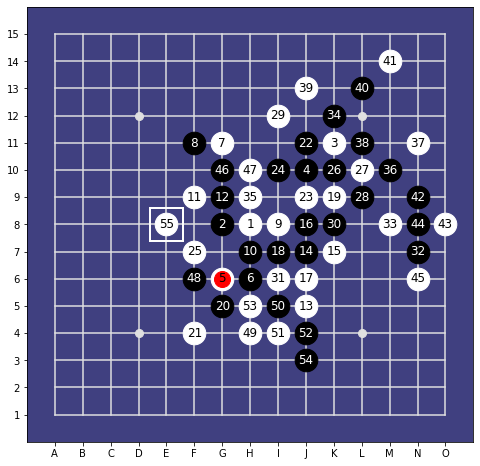

In [12]:
from alphazero.utils import analyse_board
analyse_board(15, board.stones, policy)

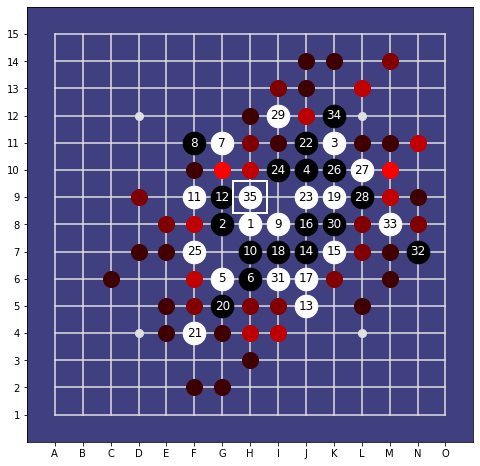

In [13]:
analyse_board(15, board.stones[:-20], policy)